# **Downloading Dataset**

Connecting Google Colab with Kaggle in order to to download the data from kaggle.

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
#
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthik12s","key":"56a984ed14e695d673666653747fb61e"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Jun 13 07:54 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                     Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           7224        221  1.0              
devansodariya/student-performance-data                       Student Performance Dataset                           7KB  2022-05-26 13:55:09           3091        126  0.9705882        
iamsouravbanerjee/software-professional-salaries-2022        Salary Dataset - 2022                               526KB  2022-06-10 06:02:59           1109         34  1.0              
paradisejoy/top-hits-spotify-from-20002019                   Top Hits Spoti

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

 95% 627M/658M [00:02<00:00, 263MB/s]
100% 658M/658M [00:02<00:00, 260MB/s]


In [ ]:
# kaggle datasets download -d emmarex/plantdisease

In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

# **Processing**

In [ ]:
import numpy as np  #array manipulation
# import pandas as pd  #sheets
import tensorflow as tf
from tensorflow import keras # framework for deep learning applications
import os # to access files
import cv2 # image manipulation
from PIL import Image # image plot
import random # for shuffling

In [ ]:
label_dict={0:'Pepper__bell___Bacterial_spot', 1:'Potato___healthy', 2:'Tomato_Leaf_Mold',
            3:'Tomato__Tomato_YellowLeaf__Curl_Virus', 4:'Tomato_Bacterial_spot', 5:'Tomato_Septoria_leaf_spot',
            6:'Tomato_healthy', 7:'Tomato_Spider_mites_Two_spotted_spider_mite', 8:'Tomato_Early_blight',
            9:'Tomato__Target_Spot', 10:'Pepper__bell___healthy', 11:'Potato___Late_blight', 12:'Tomato_Late_blight',
            13:'Potato___Early_blight', 14:'Tomato__Tomato_mosaic_virus'}

In [ ]:
pesticides = {
	"Apple___Apple_scab": ["Choose resistant varieties when possible. Rake under trees and destroy infected leaves to reduce the number of fungal spores available to start the disease cycle over again next spring. Water in the evening or early morning hours (avoid overhead irrigation) to give the leaves time to dry out before infection can occur.",
		"liquid copper soap"
	],


	"Apple___Black_rot": ["Hopefully, you are now well aware of the importance of getting rid of these sources of fungal infection.  This is the primary method of control. Remove the cankers by pruning at least 15 inches below the end and burn or bury them.  Also take preventative care with new season prunings and burn them, too.",
		"captan and sulphar products(lime sulphur)"
	],


	"Apple___Cedar_apple_rust": ["Choose resistant cultivars when available. Rake up and dispose of fallen leaves and other debris from under trees. Remove galls from infected junipers. In some cases, juniper plants should be removed entirely.", "myclobutanil(Immunox)"],


	"Apple___healthy": "Healthy leaf don't require any treatment",


	"Cherry_(including_sour)___Powdery_mildew": ["The key to managing powdery mildew on the fruit is to keep the disease off of the leaves.  Most synthetic fungicides are preventative, not eradicative, so be pro-active about disease prevention.  Maintain a consistent program from shuck fall through harvest. ",
		"copper based fungicide(green cure fungicide)"
	],


	"Blueberry___healthy": "Healthy leaf don't require any treatment",


	"Cherry_(including_sour)___healthy": "Healthy leaf don't require any treatment",


	"Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": ["Plant corn hybrids with resistance to the disease; crop rotation and plowing debris into soil may reduce levels of inoculum in the soil but may not provide control in areas where the disease is prevalent; foliar fungicides may be economically viable for some high yeilding susceptible hybrids.",
		"foliar fungicide"
	],


	"Corn_(maize)___Common_rust_": ["The most effective method of controlling the disease is to plant resistant hybrids; application of appropriate fungicides may provide some degree on control and reduce disease severity; fungicides are most effective when the amount of secondary inoculum is still low, generally when plants only have a few rust pustules per leaf.",
		"stratego YLD"
	],

	"Corn_(maize)___Northern_Leaf_Blight": ["Follow proper tillage to reduce fungus inoculum from crop debris. Follow crop rotation with non host crop. Grow available resistant varieties. In severe case of disease incidence apply suitable fungicide.",
		"Delaro® fungicide"
	],


	"Corn_(maize)___healthy": "Healthy leaf don't require any treatment",

	"Grape___Black_rot": ["Black rot (Guignardia bidwelli) is a fungal disease that occurs in grapes grown in a hot and humid climate. This fungal disease has the ability to ruin an entire crop of grapes if it is allowed to spread unchecked. Fortunately, there are both cultural and chemical ways to rid your plants of this disease.",
		"mancozeb + mycobutanil, imidacloprid or azadirachtin"
	],


	"Grape___Esca_(Black_Measles)": ["The fungi Phaeoacremonium aleophilum, Phaeomoniella chlamydospora[1] and Fomitiporia mediterranea[2] are associated with the disease.",
		"Bio - Tam 2.0"
	],


	"Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": ["The pathogen survives in infected plant residue in soil and seed borne.Favourable conditionsThe disease is more prevalent during June-August and again in February-March.Temperature range of 25-30 ºC and relative humidity of 80-90% is favourable for the development of the disease.",
		"Streptocycline(500 ppm)"
	],


	"Grape___healthy": "Healthy leaf don't require any treatment",


	"Orange___Haunglongbing_(Citrus_greening)": ["A number of predators and parasites feed on ACP. The nymphs are killed by tiny parasitic wasps and various predators, including lady beetle adults and larvae, syrphid fly larvae, lacewing larvae, and minute pirate bugs. Some spiders, birds, and other general predators feed on adult psyllids.",
		"Montery Horticultural oils "
	],


	"Peach___Bacterial_spot": ["It's Easy To Misdiagnose Bacterial Spot On Peaches. Bacterial spot is a major disease for peach and nectarine growing areas experiencing warm, wet springs and summers. Effective management requires a diverse toolbox to combat the disease from shuck split through cover sprays. One such tool is the use of copper",
		"copper, oxytetracycline(Mycoshield and generic equivalents), and syllit + captan"
	],


	"Peach___healthy": "Healthy leaf don't require any treatment",


	"Pepper__bell___Bacterial_spot": ["For plant beds and flats in the greenhouse, keep the house as dry as possible and avoid splashing water. Spray with fixed coppers (i.e., tribasic copper sulfate and copper hydroxide), alone or in combination with 200 ppm streptomycin (11b/100 gal water in the copper spray), with the addition of spreader-sticker to improve the effectiveness of the spray. Streptomycin cannot be used in the field. Start field treatment as soon as disease appears,",
		"copper pesticides Cuprofix Ultra"
	],


	"Pepper__bell___healthy": "Healthy leaf don't require any treatment",


	"Potato___Early_blight": ["Alternaria solani is a fungal pathogen that produces a disease in tomato and potato plants called early blight. The pathogen produces distinctive bullseye patterned leaf spots and can also cause stem lesions and fruit rot on tomato and tuber blight on potato",
		"Penthiopyrad"
	],


	"Potato___Late_blight": ["If infected tubers make it into the storage bin, there's a very high risk to the storage life of that bin. Once in storage, there isn't much that can be done besides emptying the parts of the bin that contain tubers infected with Phytophthora infestans. ",
		"Metalaxyl a phenylamide"
	],


	"Potato___healthy": "Healthy leaf don't require any treatment",


	"Raspberry___healthy": "Healthy leaf don't require any treatment",


	"Soybean___healthy": "Healthy leaf don't require any treatment",


	"Squash___Powdery_mildew": ["Use resistant varieties when they are available. Thin plants to proper spacing so each leaf gets good exposure to sun and fresh air. Plant fast-growing varieties of summer squash to sidestep this disease. Starting in early summer, spray plants every 10 days with a mixture of one part milk (any kind) to four parts water.",
		"neem oil, sulfur and stylet oil, copper fungicides"
	],


	"Strawberry___Leaf_scorch": ["The best way to treat this disease is to alter watering practices and allow for dryer conditions. If that isn't possible, you can treat your strawberries with organic fungicides like Captan 50 WP and Copper compounds.",
		"Tata Taqat, Fungicide, Captan 70 % , Hexaconazole 5 % WP, 500 Gm(or) garlic oil spray"
	],



	"Strawberry___healthy": "Healthy leaf don't require any treatment",


	"Tomato_Bacterial_spot": ["Bacterial spot can be a devastating disease when the weather is warm and humid. The disease can affect all above-ground parts of tomato and pepper plants: stems, petioles, leaves, and fruits. ... Tomato leaves have small (<1/8 inch), brown, circular spots surrounded by a yellow halo.",
		"copper - tolerant Xanthomonas strains"
	],


	"Tomato_Early_blight": ["Prune or stake plants to improve air circulation and reduce fungal problems.Make sure to disinfect your pruning shears (one part bleach to 4 parts water) after each cut.Keep the soil under plants clean and free of garden debris. ...Drip irrigation and soaker hoses can be used to help keep the foliage dry.",
		"Bonide® Copper Fungicide Dust"
	],


	"Tomato_Late_blight": ["When it rains, water hits the ground, splashing soil and spores onto the lower leaves of plants, where the disease shows its earliest symptoms. While there is no cure for blight on plants or in the soil, 2 there are some simple ways to control this disease.",
		"Bonide 811 Copper 4 E Fungicide."
	],



	"Tomato_Leaf_Mold": ["Managing Tomatoes With Leaf Mold. If you grow tomatoes in a greenhouse or high tunnel, you are more likely to have problems with leaf mold of tomato. ... Read on to find out the symptoms of tomatoes with leaf mold and tomato leaf mold treatment options.",
		"chlorothalonil,maneb, mancozeb and copper formulations."
	],


	"Tomato_Septoria_leaf_spot": ["Removing infected leaves. Remove infected leaves immediately, and be sure to wash your hands thoroughly before working with uninfected plants.Consider organic fungicide options. ...Consider chemical fungicides.",
		"Fungonil and Daconil"
	],


	"Tomato_Spider_mites_Two_spotted_spider_mite": ["Spray infested plants with horticultural oil or insecticidal soap to kill spider mites. Follow product recommendations for proper mixing and preparation. Make certain to cover the undersides of leaves thoroughly.",
		"bifenthrin and permethrin"
	],


	"Tomato__Target_Spot": ["Do not plant new crops next to older ones that have the disease.Plant as far as possible from papaya, especially if leaves have small angular spots (Photo 5).Check all seedlings in the nursery, and throw away any with leaf spots.", "Chlorothalonil",
		"Azoxystrobin"
	],


	"Tomato__Tomato_YellowLeaf__Curl_Virus": ["Maintain good weed control in the field and surrounding areas. Prevent the spread of any whiteflies to healthy plants. Tomato and pepper fields should be cleaned up immediately after harvest. Also destroy crop residues of melons and cotton immediately after harvest to reduce whitefly migration.",
		"azadirachtin and pyrethrin insectiside"
	],


	"Tomato__Tomato_mosaic_virus": ["Inspect transplants prior to purchase. Choose only transplants showing no clear symptoms. Avoid planting in fields where tomato root debris is present, as the virus can survive long-term in roots. Wash hands with soap and water before and during the handling of plants to reduce potential spread between plants",
		"Bon - Neem"
	],



	"Tomato_healthy": "Healthy leaf don't require any treatment"
}

In [ ]:
pesticides = {'Apple___Apple_scab': ['Choose resistant varieties when possible. Rake under trees and destroy infected leaves to reduce the number of fungal spores available to start the disease cycle over again next spring. Water in the evening or early morning hours (avoid overhead irrigation) to give the leaves time to dry out before infection can occur.',
  'liquid copper soap'],
 'Apple___Black_rot': ['Hopefully, you are now well aware of the importance of getting rid of these sources of fungal infection.  This is the primary method of control. Remove the cankers by pruning at least 15 inches below the end and burn or bury them.  Also take preventative care with new season prunings and burn them, too.',
  'captan and sulphar products(lime sulphur)'],
 'Apple___Cedar_apple_rust': ['Choose resistant cultivars when available. Rake up and dispose of fallen leaves and other debris from under trees. Remove galls from infected junipers. In some cases, juniper plants should be removed entirely.',
  'myclobutanil(Immunox)'],
 'Apple___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Blueberry___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Cherry_(including_sour)___Powdery_mildew': ['The key to managing powdery mildew on the fruit is to keep the disease off of the leaves.  Most synthetic fungicides are preventative, not eradicative, so be pro-active about disease prevention.  Maintain a consistent program from shuck fall through harvest. ',
  'copper based fungicide(green cure fungicide)'],
 'Cherry_(including_sour)___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': ['Plant corn hybrids with resistance to the disease; crop rotation and plowing debris into soil may reduce levels of inoculum in the soil but may not provide control in areas where the disease is prevalent; foliar fungicides may be economically viable for some high yeilding susceptible hybrids.',
  'foliar fungicide'],
 'Corn_(maize)___Common_rust_': ['The most effective method of controlling the disease is to plant resistant hybrids; application of appropriate fungicides may provide some degree on control and reduce disease severity; fungicides are most effective when the amount of secondary inoculum is still low, generally when plants only have a few rust pustules per leaf.',
  'stratego YLD'],
 'Corn_(maize)___Northern_Leaf_Blight': ['Follow proper tillage to reduce fungus inoculum from crop debris. Follow crop rotation with non host crop. Grow available resistant varieties. In severe case of disease incidence apply suitable fungicide.',
  'Delaro® fungicide'],
 'Corn_(maize)___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Grape___Black_rot': ['Black rot (Guignardia bidwelli) is a fungal disease that occurs in grapes grown in a hot and humid climate. This fungal disease has the ability to ruin an entire crop of grapes if it is allowed to spread unchecked. Fortunately, there are both cultural and chemical ways to rid your plants of this disease.',
  'mancozeb + mycobutanil, imidacloprid or azadirachtin'],
 'Grape___Esca_(Black_Measles)': ['The fungi Phaeoacremonium aleophilum, Phaeomoniella chlamydospora[1] and Fomitiporia mediterranea[2] are associated with the disease.',
  'Bio - Tam 2.0'],
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': ['The pathogen survives in infected plant residue in soil and seed borne.Favourable conditionsThe disease is more prevalent during June-August and again in February-March.Temperature range of 25-30 ºC and relative humidity of 80-90% is favourable for the development of the disease.',
  'Streptocycline(500 ppm)'],
 'Grape___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Orange___Haunglongbing_(Citrus_greening)': ['A number of predators and parasites feed on ACP. The nymphs are killed by tiny parasitic wasps and various predators, including lady beetle adults and larvae, syrphid fly larvae, lacewing larvae, and minute pirate bugs. Some spiders, birds, and other general predators feed on adult psyllids.',
  'Montery Horticultural oils '],
 'Peach___Bacterial_spot': ["It's Easy To Misdiagnose Bacterial Spot On Peaches. Bacterial spot is a major disease for peach and nectarine growing areas experiencing warm, wet springs and summers. Effective management requires a diverse toolbox to combat the disease from shuck split through cover sprays. One such tool is the use of copper",
  'copper, oxytetracycline(Mycoshield and generic equivalents), and syllit + captan'],
 'Peach___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Pepper__bell___Bacterial_spot': ['For plant beds and flats in the greenhouse, keep the house as dry as possible and avoid splashing water. Spray with fixed coppers (i.e., tribasic copper sulfate and copper hydroxide), alone or in combination with 200 ppm streptomycin (11b/100 gal water in the copper spray), with the addition of spreader-sticker to improve the effectiveness of the spray. Streptomycin cannot be used in the field. Start field treatment as soon as disease appears,',
  'copper pesticides Cuprofix Ultra'],
 'Pepper__bell___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Potato___Early_blight': ['Alternaria solani is a fungal pathogen that produces a disease in tomato and potato plants called early blight. The pathogen produces distinctive bullseye patterned leaf spots and can also cause stem lesions and fruit rot on tomato and tuber blight on potato',
  'Penthiopyrad'],
 'Potato___Late_blight': ["If infected tubers make it into the storage bin, there's a very high risk to the storage life of that bin. Once in storage, there isn't much that can be done besides emptying the parts of the bin that contain tubers infected with Phytophthora infestans. ",
  'Metalaxyl a phenylamide'],
 'Potato___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Raspberry___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Soybean___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Squash___Powdery_mildew': ['Use resistant varieties when they are available. Thin plants to proper spacing so each leaf gets good exposure to sun and fresh air. Plant fast-growing varieties of summer squash to sidestep this disease. Starting in early summer, spray plants every 10 days with a mixture of one part milk (any kind) to four parts water.',
  'neem oil, sulfur and stylet oil, copper fungicides'],
 'Strawberry___Leaf_scorch': ["The best way to treat this disease is to alter watering practices and allow for dryer conditions. If that isn't possible, you can treat your strawberries with organic fungicides like Captan 50 WP and Copper compounds.",
  'Tata Taqat, Fungicide, Captan 70 % , Hexaconazole 5 % WP, 500 Gm(or) garlic oil spray'],
 'Strawberry___healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required'],
 'Tomato_Bacterial_spot': ['Bacterial spot can be a devastating disease when the weather is warm and humid. The disease can affect all above-ground parts of tomato and pepper plants: stems, petioles, leaves, and fruits. ... Tomato leaves have small (<1/8 inch), brown, circular spots surrounded by a yellow halo.',
  'copper - tolerant Xanthomonas strains'],
 'Tomato_Early_blight': ['Prune or stake plants to improve air circulation and reduce fungal problems.Make sure to disinfect your pruning shears (one part bleach to 4 parts water) after each cut.Keep the soil under plants clean and free of garden debris. ...Drip irrigation and soaker hoses can be used to help keep the foliage dry.',
  'Bonide® Copper Fungicide Dust'],
 'Tomato_Late_blight': ['When it rains, water hits the ground, splashing soil and spores onto the lower leaves of plants, where the disease shows its earliest symptoms. While there is no cure for blight on plants or in the soil, 2 there are some simple ways to control this disease.',
  'Bonide 811 Copper 4 E Fungicide.'],
 'Tomato_Leaf_Mold': ['Managing Tomatoes With Leaf Mold. If you grow tomatoes in a greenhouse or high tunnel, you are more likely to have problems with leaf mold of tomato. ... Read on to find out the symptoms of tomatoes with leaf mold and tomato leaf mold treatment options.',
  'chlorothalonil,maneb, mancozeb and copper formulations.'],
 'Tomato_Septoria_leaf_spot': ['Removing infected leaves. Remove infected leaves immediately, and be sure to wash your hands thoroughly before working with uninfected plants.Consider organic fungicide options. ...Consider chemical fungicides.',
  'Fungonil and Daconil'],
 'Tomato_Spider_mites_Two_spotted_spider_mite': ['Spray infested plants with horticultural oil or insecticidal soap to kill spider mites. Follow product recommendations for proper mixing and preparation. Make certain to cover the undersides of leaves thoroughly.',
  'bifenthrin and permethrin'],
 'Tomato__Target_Spot': ['Do not plant new crops next to older ones that have the disease.Plant as far as possible from papaya, especially if leaves have small angular spots (Photo 5).Check all seedlings in the nursery, and throw away any with leaf spots.',
  'Chlorothalonil',
  'Azoxystrobin'],
 'Tomato__Tomato_YellowLeaf__Curl_Virus': ['Maintain good weed control in the field and surrounding areas. Prevent the spread of any whiteflies to healthy plants. Tomato and pepper fields should be cleaned up immediately after harvest. Also destroy crop residues of melons and cotton immediately after harvest to reduce whitefly migration.',
  'azadirachtin and pyrethrin insectiside'],
 'Tomato__Tomato_mosaic_virus': ['Inspect transplants prior to purchase. Choose only transplants showing no clear symptoms. Avoid planting in fields where tomato root debris is present, as the virus can survive long-term in roots. Wash hands with soap and water before and during the handling of plants to reduce potential spread between plants',
  'Bon - Neem'],
 'Tomato_healthy': ["Healthy leaf don't require any treatment",
  'No pesticide Required']}

In [ ]:
def get_label(x):
    return label_dict[x]

In [ ]:
# categories

In [ ]:
np.shape(cv2.imread("/content/plantvillage/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG"))

(256, 256, 3)

In [ ]:
# categories

In [ ]:
decode_label_dict = {}
for i in label_dict:
  decode_label_dict[label_dict[i]] = i

In [ ]:
decode_label_dict

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 10,
 'Potato___Early_blight': 13,
 'Potato___Late_blight': 11,
 'Potato___healthy': 1,
 'Tomato_Bacterial_spot': 4,
 'Tomato_Early_blight': 8,
 'Tomato_Late_blight': 12,
 'Tomato_Leaf_Mold': 2,
 'Tomato_Septoria_leaf_spot': 5,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 7,
 'Tomato__Target_Spot': 9,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 3,
 'Tomato__Tomato_mosaic_virus': 14,
 'Tomato_healthy': 6}

In [ ]:
path='/content/plantvillage/PlantVillage/'
categories=os.listdir(path)
training=[]
categories
for category in categories:
    class_num=decode_label_dict[category]
    for img in os.listdir(path+category):
        if img.endswith('.jpg') or img.endswith('.JPG'):
            img_array=cv2.imread(path+category+'/'+img)
            new_array=cv2.resize(img_array,(64,64)) # to reduce the bulkness of model
            training.append([new_array, class_num])
training[0]

[array([[[109, 106, 122],
         [105, 102, 118],
         [115, 112, 128],
         ...,
         [165, 160, 175],
         [148, 143, 158],
         [160, 155, 170]],
 
        [[ 93,  90, 106],
         [105, 102, 118],
         [101,  98, 114],
         ...,
         [151, 146, 161],
         [148, 143, 158],
         [147, 142, 157]],
 
        [[100,  97, 113],
         [ 88,  85, 101],
         [ 99,  96, 112],
         ...,
         [145, 140, 155],
         [144, 139, 154],
         [149, 144, 159]],
 
        ...,
 
        [[115, 111, 123],
         [111, 107, 119],
         [110, 106, 118],
         ...,
         [134, 127, 140],
         [146, 139, 152],
         [135, 128, 141]],
 
        [[101,  97, 109],
         [116, 112, 124],
         [107, 103, 115],
         ...,
         [145, 138, 151],
         [151, 144, 157],
         [143, 136, 149]],
 
        [[103,  99, 111],
         [114, 110, 122],
         [107, 103, 115],
         ...,
         [133, 126, 139],
  

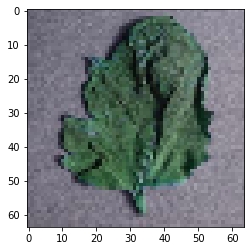

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training[0][0])

In [ ]:
np.shape(training[0][0])

(64, 64, 3)

In [ ]:
random.shuffle(training)

In [ ]:
np.shape(training[0][0])

(64, 64, 3)

In [ ]:
X=[]
y=[]
for features, label in training:
    X.append(features)
    y.append(label)
# x1 = np.array(X)
X=np.array(X).reshape(-1,64,64,3)

In [ ]:
np.shape(X)

(20636, 64, 64, 3)

In [ ]:
X[0]

array([[[161, 145, 152],
        [150, 134, 141],
        [163, 147, 154],
        ...,
        [131, 116, 124],
        [132, 117, 125],
        [120, 105, 113]],

       [[153, 137, 144],
        [161, 145, 152],
        [161, 145, 152],
        ...,
        [129, 114, 122],
        [131, 116, 124],
        [119, 104, 112]],

       [[154, 138, 145],
        [168, 152, 159],
        [154, 138, 145],
        ...,
        [127, 112, 120],
        [126, 111, 119],
        [127, 112, 120]],

       ...,

       [[150, 142, 153],
        [160, 152, 163],
        [156, 148, 159],
        ...,
        [122, 113, 126],
        [120, 111, 124],
        [120, 111, 124]],

       [[163, 155, 166],
        [162, 154, 165],
        [157, 149, 160],
        ...,
        [122, 113, 126],
        [109, 100, 113],
        [107,  98, 111]],

       [[156, 148, 159],
        [161, 153, 164],
        [157, 149, 160],
        ...,
        [114, 105, 118],
        [ 92,  83,  96],
        [113, 104, 117]]

In [ ]:
y[0]

11

In [ ]:
X=X.astype('float32')
X/=255
from keras.utils import np_utils
Y=np_utils.to_categorical(y,15)
print(Y[100])
print(Y.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(20636, 15)


In [ ]:
Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# **Model Building**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu,input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(15,  activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 16384)             0

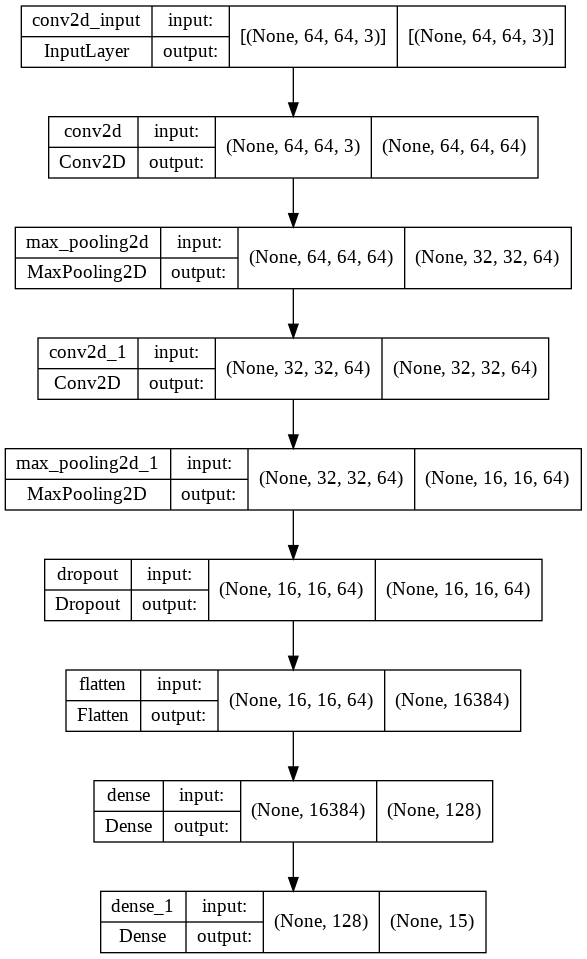

In [ ]:
from IPython.display import Image
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# Image(retina=True, filename='model.png')

In [ ]:
batch_size = 32
# nb_classes =4
nb_epochs = 10
img_rows, img_columns = 64, 64
img_channel = 3
# nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size = batch_size, epochs = nb_epochs,
          verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
452/452 [==============================] - 17s 12ms/step - loss: 1.2334 - accuracy: 0.6066 - val_loss: 0.7160 - val_accuracy: 0.7663
Epoch 2/10
452/452 [==============================] - 5s 10ms/step - loss: 0.5708 - accuracy: 0.8092 - val_loss: 0.7002 - val_accuracy: 0.7682
Epoch 3/10
452/452 [==============================] - 4s 9ms/step - loss: 0.3856 - accuracy: 0.8708 - val_loss: 0.4286 - val_accuracy: 0.8567
Epoch 4/10
452/452 [==============================] - 5s 10ms/step - loss: 0.2867 - accuracy: 0.9045 - val_loss: 0.3680 - val_accuracy: 0.8771
Epoch 5/10
452/452 [==============================] - 5s 10ms/step - loss: 0.2405 - accuracy: 0.9193 - val_loss: 0.3448 - val_accuracy: 0.8895
Epoch 6/10
452/452 [==============================] - 4s 10ms/step - loss: 0.1813 - accuracy: 0.9385 - val_loss: 0.3103 - val_accuracy: 0.9031
Epoch 7/10
452/452 [==============================] - 5s 10ms/step - loss: 0.1781 - accuracy: 0.9396 - val_loss: 0.2773 - val_accuracy: 0.9087

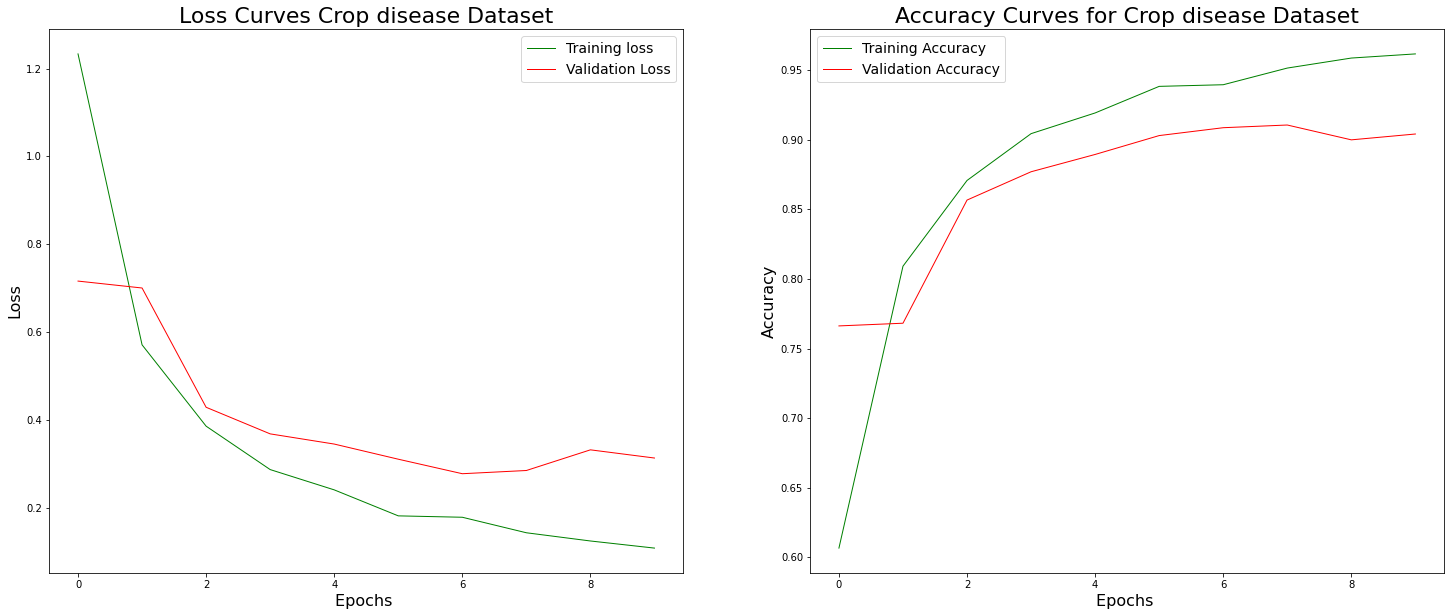

In [ ]:
import matplotlib.pyplot as plt

  # Loss Curves
history = hist
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],'-g',linewidth=1.0)
plt.plot(history.history['val_loss'],'r',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves Crop disease Dataset',fontsize=22)
plt.savefig('Loss_curves.png')
# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'],'-g',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'r',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves for Crop disease Dataset',fontsize=22)
plt.savefig('Accuracy_curves.png')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.3129969835281372
Test accuracy:  0.9042158126831055


In [ ]:
def get_pesticide_name(arr):
    arr = list(arr)
    ind = arr.index(max(arr))
    print("Disease Name :" ,label_dict[ind])
    for i in pesticides[label_dict[ind]]:
      print(i)

In [ ]:
y = model.predict(X_test).round(2)

In [ ]:
y[2]

array([0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.  ,
       0.  , 0.77, 0.  , 0.  ], dtype=float32)

In [ ]:
get_pesticide_name(y[14])

Disease Name : Tomato_Bacterial_spot
Bacterial spot can be a devastating disease when the weather is warm and humid. The disease can affect all above-ground parts of tomato and pepper plants: stems, petioles, leaves, and fruits. ... Tomato leaves have small (<1/8 inch), brown, circular spots surrounded by a yellow halo.
copper - tolerant Xanthomonas strains


In [ ]:
y_test[0]

12

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

In [ ]:
get_pesticide_name(y[4])

Disease Name : Tomato_Late_blight
When it rains, water hits the ground, splashing soil and spores onto the lower leaves of plants, where the disease shows its earliest symptoms. While there is no cure for blight on plants or in the soil, 2 there are some simple ways to control this disease.
Bonide 811 Copper 4 E Fungicide.


In [ ]:
# for i in pesticides:
#   if str(type(pesticides[i]))!= "<class 'list'>":
#     pesticides[i] = [pesticides[i],"No pesticide Required"]
#     print(i,str(type(pesticides[i])))

In [ ]:
pesticides

{'Apple___Apple_scab': ['Choose resistant varieties when possible. Rake under trees and destroy infected leaves to reduce the number of fungal spores available to start the disease cycle over again next spring. Water in the evening or early morning hours (avoid overhead irrigation) to give the leaves time to dry out before infection can occur.',
  'liquid copper soap'],
 'Apple___Black_rot': ['Hopefully, you are now well aware of the importance of getting rid of these sources of fungal infection.  This is the primary method of control. Remove the cankers by pruning at least 15 inches below the end and burn or bury them.  Also take preventative care with new season prunings and burn them, too.',
  'captan and sulphar products(lime sulphur)'],
 'Apple___Cedar_apple_rust': ['Choose resistant cultivars when available. Rake up and dispose of fallen leaves and other debris from under trees. Remove galls from infected junipers. In some cases, juniper plants should be removed entirely.',
  'my

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 40 kB 7.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, "/content/sample_data/jsfiles")